##1. Load Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("somesh24/spambase")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spambase


In [ ]:
import os

# List all files in the dataset folder
print(os.listdir(path))


['spambase_csv.csv']


In [ ]:
import pandas as pd

df = pd.read_csv(os.path.join(path, 'spambase_csv.csv'))  # adjust name if needed
print(df.head())


   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

In [ ]:
print(df.shape)
print(df.dtypes)


(4601, 58)
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
w

##2. EDA

Split features and label

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

Visualize Class Balance

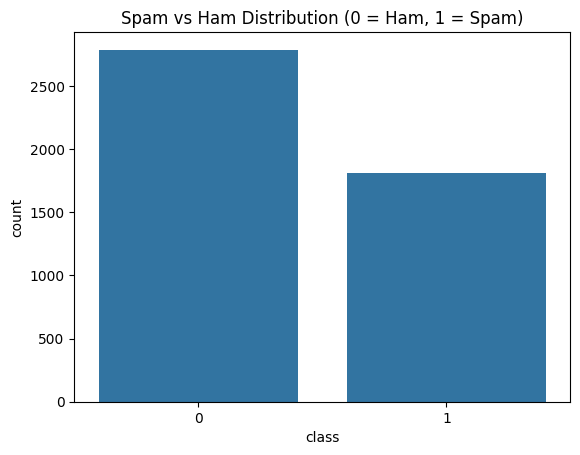

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Spam vs Ham Distribution (0 = Ham, 1 = Spam)")
plt.show()


Check for Missing Values

In [ ]:
print(X.isnull().sum().sum())  # Should be 0


0


##3. Scale the Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 4. Splitting (Train, Valid, Test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


##5. Model Building - Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}


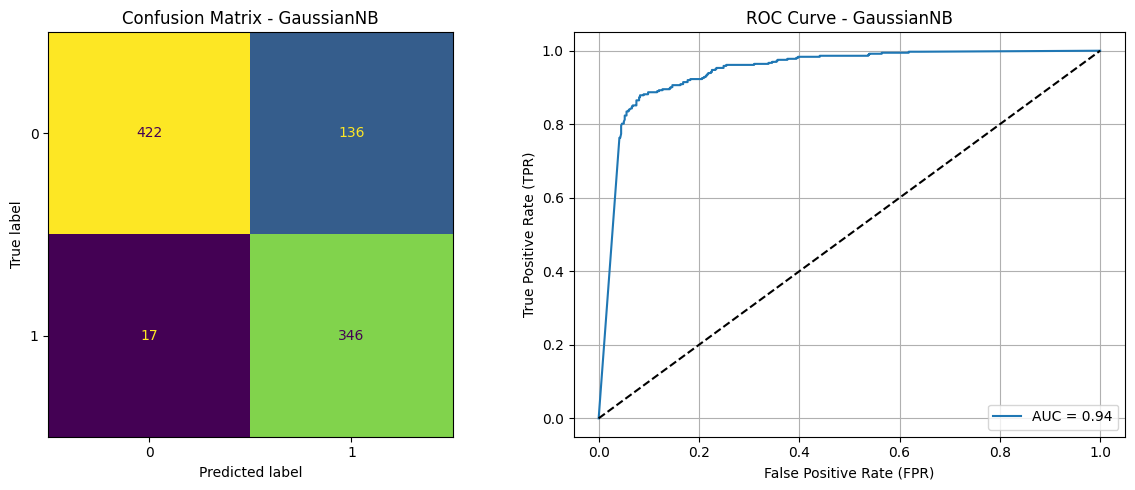

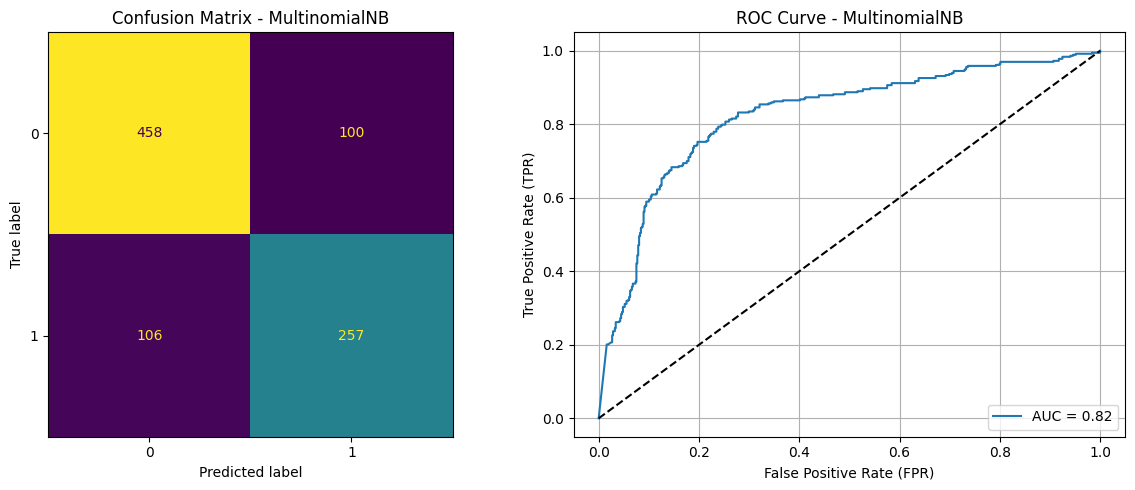

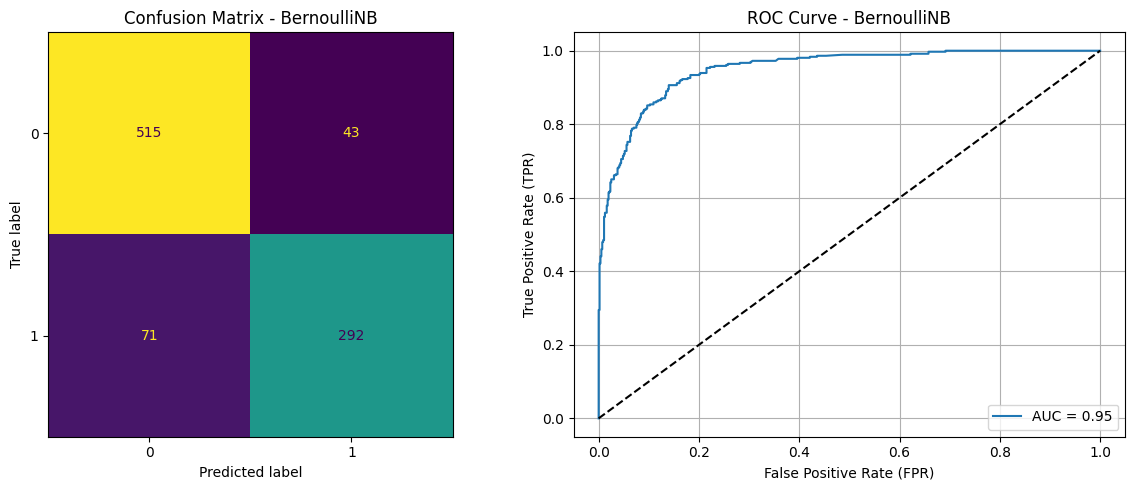

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    results.append([name, acc, prec, rec, f1])

    # Create subplots for CM and ROC
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=axes[0], colorbar=False)
    axes[0].set_title(f"Confusion Matrix - {name}")

    # --- ROC Curve ---
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        axes[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        axes[1].plot([0, 1], [0, 1], 'k--')
        axes[1].set_title(f"ROC Curve - {name}")
        axes[1].set_xlabel("False Positive Rate (FPR)")
        axes[1].set_ylabel("True Positive Rate (TPR)")
        axes[1].legend(loc="lower right")
        axes[1].grid(True)
    else:
        axes[1].text(0.5, 0.5, "ROC Not Available", ha="center", va="center", fontsize=12)
        axes[1].set_axis_off()

    plt.tight_layout()
    plt.show()


In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df = results_df.sort_values(by='F1-Score', ascending=False)
print("\nModel Performance Summary:\n")
print(results_df)



Model Performance Summary:

           Model  Accuracy  Precision    Recall  F1-Score
2    BernoulliNB  0.876221   0.871642  0.804408  0.836676
0     GaussianNB  0.833876   0.717842  0.953168  0.818935
1  MultinomialNB  0.776330   0.719888  0.707989  0.713889


##5.2 Model Building - KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Try multiple Ks and algorithms
models = {}
for k in [1, 3, 5, 7]:
    models[f"KNN_k={k}_kd"] = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    models[f"KNN_k={k}_ball"] = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')



Performance for varying k (kd_tree):
    k  Accuracy  Precision    Recall        F1
0  1  0.807246   0.745583  0.775735  0.760360
1  3  0.797101   0.742647  0.742647  0.742647
2  5  0.797101   0.750000  0.727941  0.738806
3  7  0.804348   0.758491  0.738971  0.748603

Best k value: 1.0

Performance for kd_tree vs ball_tree:
    Algorithm  Accuracy  Precision    Recall       F1
0    kd_tree  0.807246   0.745583  0.775735  0.76036
1  ball_tree  0.807246   0.745583  0.775735  0.76036

Best algorithm: kd_tree

Final Test Set Performance:
Accuracy: 0.7873
Precision: 0.7178
Recall: 0.7574
F1 Score: 0.7370


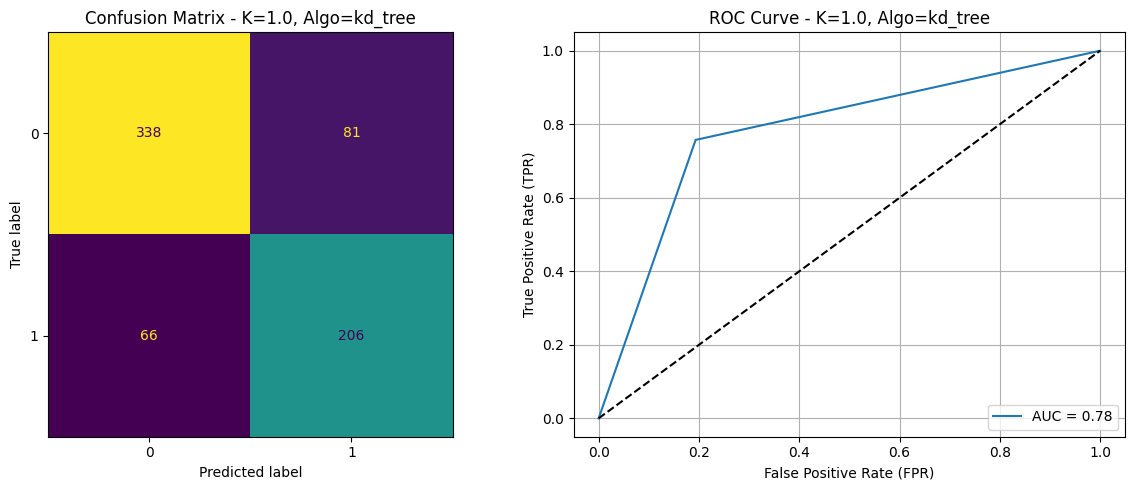

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
)
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Split into train/val/test ---
X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# --- Stage 1: Vary k (algorithm fixed to kd_tree) ---
k_values = [1, 3, 5, 7]
k_results = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    model.fit(X_train_full, y_train_full)
    y_pred_val = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred_val)
    prec = precision_score(y_val, y_pred_val, average='binary')
    rec = recall_score(y_val, y_pred_val, average='binary')
    f1 = f1_score(y_val, y_pred_val, average='binary')

    k_results.append([k, acc, prec, rec, f1])

df_k = pd.DataFrame(k_results, columns=["k", "Accuracy", "Precision", "Recall", "F1"])
print("\nPerformance for varying k (kd_tree):\n", df_k)

best_k = df_k.sort_values("Accuracy", ascending=False).iloc[0]["k"]
print(f"\nBest k value: {best_k}")

# --- Stage 2: Compare kd_tree vs ball_tree for best k ---
algorithms = ["kd_tree", "ball_tree"]
algo_results = []

for algo in algorithms:
    model = KNeighborsClassifier(n_neighbors=int(best_k), algorithm=algo)
    model.fit(X_train_full, y_train_full)
    y_pred_val = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred_val)
    prec = precision_score(y_val, y_pred_val, average='binary')
    rec = recall_score(y_val, y_pred_val, average='binary')
    f1 = f1_score(y_val, y_pred_val, average='binary')

    algo_results.append([algo, acc, prec, rec, f1])

df_algo = pd.DataFrame(algo_results, columns=["Algorithm", "Accuracy", "Precision", "Recall", "F1"])
print("\nPerformance for kd_tree vs ball_tree:\n", df_algo)

best_algo = df_algo.sort_values("Accuracy", ascending=False).iloc[0]["Algorithm"]
print(f"\nBest algorithm: {best_algo}")

# --- Stage 3: Final evaluation on test set ---
final_model = KNeighborsClassifier(n_neighbors=int(best_k), algorithm=best_algo)
final_model.fit(X_train_full, y_train_full)
y_pred_test = final_model.predict(X_test)
y_proba_test = final_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test, average='binary')
rec = recall_score(y_test, y_pred_test, average='binary')
f1 = f1_score(y_test, y_pred_test, average='binary')

print("\nFinal Test Set Performance:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

# --- Plots ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot(ax=axes[0], colorbar=False)
axes[0].set_title(f"Confusion Matrix - K={best_k}, Algo={best_algo}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title(f"ROC Curve - K={best_k}, Algo={best_algo}")
axes[1].set_xlabel("False Positive Rate (FPR)")
axes[1].set_ylabel("True Positive Rate (TPR)")
axes[1].legend(loc="lower right")
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold

# ===============================
# SVM Kernel-wise Evaluation
# ===============================
svm_results = []

kernels = {
    "linear": {"C": [1]},
    "poly": {"C": [1], "degree": [2], "gamma": ["scale"]},
    "rbf": {"C": [1], "gamma": ["scale"]},
    "sigmoid": {"C": [1], "gamma": ["scale"]}
}


best_svm = None
best_score = 0

for kernel, params in kernels.items():
    for C in params.get("C", [1]):
        for degree in params.get("degree", [3]):
            for gamma in params.get("gamma", ["scale"]):
                start = time.time()
                if kernel == "linear":
                    model = SVC(kernel=kernel, C=C, probability=True, random_state=42)
                elif kernel == "poly":
                    model = SVC(kernel=kernel, C=C, degree=degree, gamma=gamma, probability=True, random_state=42)
                else:
                    model = SVC(kernel=kernel, C=C, gamma=gamma, probability=True, random_state=42)

                model.fit(X_train, y_train)
                train_time = time.time() - start
                y_pred = model.predict(X_test)

                acc = accuracy_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)

                svm_results.append([kernel, f"C={C}, degree={degree if kernel=='poly' else '-'}, gamma={gamma if kernel!='linear' else '-'}",
                                    acc, f1, train_time])

                if acc > best_score:
                    best_score = acc
                    best_svm = model

svm_table = pd.DataFrame(svm_results, columns=["Kernel", "Hyperparameters", "Accuracy", "F1 Score", "Training Time"])
print("\n📊 Table 4: SVM Performance with Different Kernels")
display(svm_table)


📊 Table 4: SVM Performance with Different Kernels


,Kernel,Hyperparameters,Accuracy,F1 Score,Training Time
0,linear,"C=1, degree=-, gamma=-",0.926194,0.903226,2088.215490
1,poly,"C=1, degree=2, gamma=scale",0.668596,0.343840,5.502092
2,rbf,"C=1, degree=-, gamma=scale",0.726483,0.590022,5.392869
3,sigmoid,"C=1, degree=-, gamma=scale",0.589001,0.483636,4.809869


In [ ]:
# ===============================
# 5-Fold Cross Validation
# ===============================
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use your best models
nb_model = GaussianNB()          # Best NB
knn_model = final_model          # Best KNN found earlier
svm_model = best_svm             # Best SVM from kernel search

models_cv = {"Naïve Bayes": nb_model, "KNN": knn_model, "SVM": svm_model}

cv_results = {"Fold": [], "Naïve Bayes Accuracy": [], "KNN Accuracy": [], "SVM Accuracy": []}

# ✅ Use scaled features for fairness
for fold, (train_idx, val_idx) in enumerate(cv.split(X_scaled, y), 1):
    X_tr, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_tr, y_val = y.values[train_idx], y.values[val_idx]

    cv_results["Fold"].append(f"Fold {fold}")
    for name, model in models_cv.items():
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        cv_results[f"{name} Accuracy"].append(acc)

# Add averages
cv_results["Fold"].append("Average")
for name in models_cv.keys():
    avg = np.mean(cv_results[f"{name} Accuracy"])
    cv_results[f"{name} Accuracy"].append(avg)

cv_table = pd.DataFrame(cv_results)
print("\n📊 Cross-Validation Accuracy Scores:\n")
display(cv_table)



📊 Cross-Validation Accuracy Scores:



,Fold,Naïve Bayes Accuracy,KNN Accuracy,SVM Accuracy
0,Fold 1,0.820847,0.909881,0.917481
1,Fold 2,0.808696,0.907609,0.934783
2,Fold 3,0.801087,0.922826,0.927174
3,Fold 4,0.821739,0.910870,0.927174
4,Fold 5,0.825000,0.908696,0.923913
5,Average,0.815474,0.911976,0.926105


In [4]:
!apt-get install pandoc -y

!jupyter nbconvert --to latex "/content/drive/MyDrive/Colab Notebooks/ML_Assignment3.ipynb"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ML_Assignment3.ipynb to latex
[NbConvertApp] Support files will be in ML_Assignment3_files/
[NbConvertApp] Making directory /content/drive/MyDrive/Colab Notebooks/ML_Assignment3_files
[NbConvertApp] Writing 82026 bytes to /content/drive/MyDrive/Colab Notebooks/ML_Assignment3.tex


In [7]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/ML_Assignment3.tex')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>